
# **Análise de Dados Financeiros: Detecção de Padrões de Comportamento e Transações Suspeitas**


Este projeto tem como objetivo analisar transações financeiras para identificar padrões de comportamento financeiro, detectar possíveis fraudes e entender o perfil de transações legítimas e suspeitas.





## **Objetivos do Projeto**
1. **Limpeza e Preparação dos Dados**:
   - Tratar valores ausentes, inconsistências e erros no conjunto de dados.
   - Padronizar formatos, como datas e valores numéricos.

2. **Análise de Padrões e Perfis**:
   - Segmentar transações (débito/crédito, canal utilizado, etc.).
   - Analisar características dos clientes e dispositivos.

3. **Visualização de Dados**:
   - Criar gráficos que ilustrem tendências e padrões.

4. **Insights e Recomendações**:
   - Propor estratégias de mitigação de riscos com base nos padrões encontrados.

## **Ferramentas Utilizadas**
- **Pandas**: Manipulação e exploração de dados.
- **Seaborn** e **Matplotlib**: Criação de visualizações.


**Nota**: Este projeto foi desenvolvido utilizando um conjunto de dados disponibilizado no site: (https://www.kaggle.com/) e implementado em Python no ambiente Jupyter Notebook, integrado ao Visual Studio Code.


## **1. Importando Bibliotecas** 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **2. Leitura do Dataset**

In [3]:
df_csv_analise = pd.read_csv('/mnt/d/Analise Exploratoria de Dados/analise_padroes.csv', sep=",")


In [4]:
df_csv_analise

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


## EDA (Exploratory Data Analysis)

In [5]:
df_csv_analise.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

In [6]:
df_csv_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
# Verificando quantidade de nulos

df_csv_analise.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [8]:

# Converter a coluna TransactionDate para datetime


df_csv_analise['TransactionDate'] = pd.to_datetime(df_csv_analise['TransactionDate'])

# Calcular as datas mais recente e mais antiga

mais_recente = df_csv_analise['TransactionDate'].max()
mais_antiga = df_csv_analise['TransactionDate'].min()

# Exibir os resultados formatados
print("Transação mais recente: ", mais_recente.strftime('%d de %B de %Y, às %H:%M:%S'))
print("Transação mais antiga: ", mais_antiga.strftime('%d de %B de %Y, às %H:%M:%S'))


Transação mais recente:  01 de January de 2024, às 18:21:50
Transação mais antiga:  02 de January de 2023, às 16:00:06


In [9]:
# Converter a coluna PeviousTransactionDate para datetime

df_csv_analise['PreviousTransactionDate'] = pd.to_datetime(df_csv_analise['PreviousTransactionDate'])

df_csv_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

## Análise de Transações (Crédito x Débito)

In [10]:
# Contar a quantidade de transações por tipo (crédito e débito)
transaction_counts = df_csv_analise['TransactionType'].value_counts()

# Exibir os resultados
print("Quantidade de transações por tipo:")
print(transaction_counts.to_string())

Quantidade de transações por tipo:
Debit     1944
Credit     568


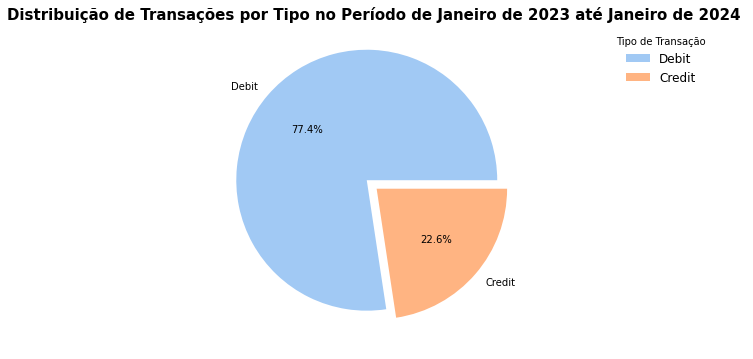

In [11]:
# Contar as transações por tipo
transaction_counts = df_csv_analise['TransactionType'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel")
plt.pie(transaction_counts, labels=transaction_counts.index, colors=colors, autopct='%1.1f%%', explode=(0.1, 0))

# Criando a legenda com as labels em negrito e fora do gráfico
plt.legend(title='Tipo de Transação', loc='upper left', bbox_to_anchor=(1.20, 1), fontsize=12, frameon=False)

plt.title('Distribuição de Transações por Tipo no Período de Janeiro de 2023 até Janeiro de 2024 ', fontsize=15, fontweight='bold')
plt.show()






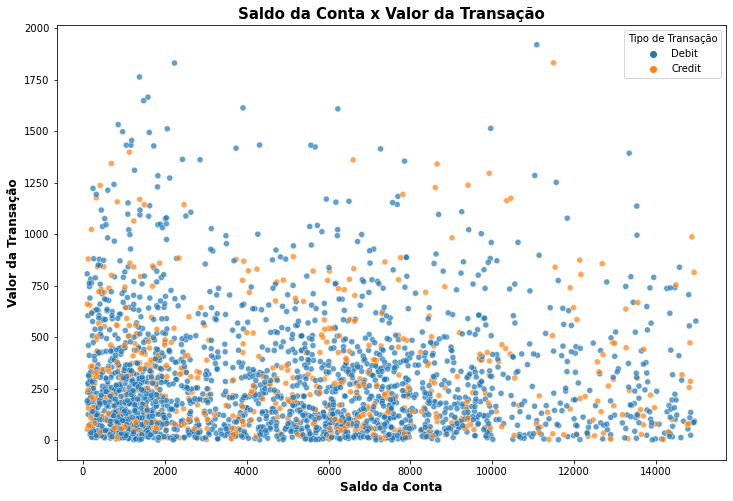

In [12]:
# Saldo da Conta x Valor da Transação
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_csv_analise, x='AccountBalance', y='TransactionAmount', hue='TransactionType', alpha=0.7)
plt.title('Saldo da Conta x Valor da Transação',fontsize=15, fontweight='bold')
plt.xlabel('Saldo da Conta', fontsize=12, fontweight='bold')
plt.ylabel('Valor da Transação',fontsize=12, fontweight='bold')
plt.legend(title='Tipo de Transação')
plt.show()


## Saldo da Conta x Valor da Transação

**Descrição:**
Este gráfico de dispersão (scatterplot) mostra como os valores das transações variam em relação ao saldo da conta.
As transações são diferenciadas por tipo (Crédito e Débito) com o uso de cores distintas.

**Insights:**

Débito:

As transações de débito ocorrem em contas com uma ampla faixa de saldos, variando de 100 a aproximadamente 15.000.
A maioria das transações de débito tem valores baixos (< 500), mas existem valores maiores esporádicos.

Crédito:

As transações de crédito geralmente ocorrem em contas com saldos mais altos que 2.000
Os valores das transações de crédito tendem a ser significativamente maiores, com a média de valores superior à das transações de débito.

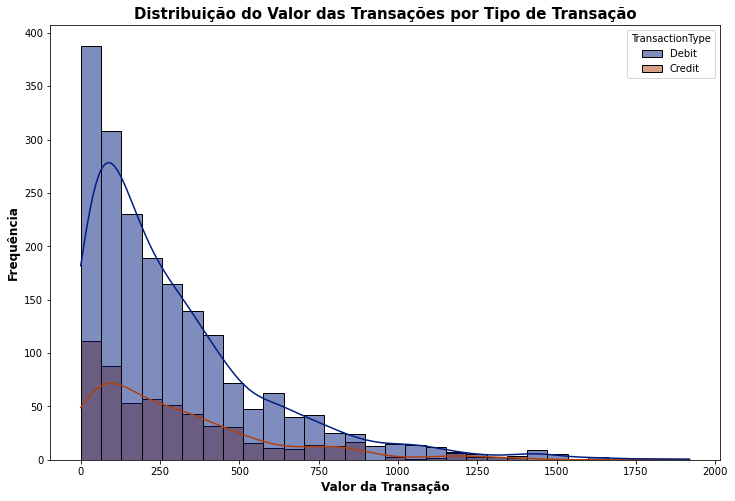

In [13]:
# Histograma de TransactionAmount por TransactionType
plt.figure(figsize=(12, 8))
sns.histplot(data=df_csv_analise, x='TransactionAmount', hue='TransactionType', kde=True, bins=30, palette='dark')
plt.title('Distribuição do Valor das Transações por Tipo de Transação', fontsize=15, fontweight='bold')
plt.xlabel('Valor da Transação', fontsize=12, fontweight='bold')
plt.ylabel('Frequência', fontsize=12, fontweight='bold')
plt.show()

## Distribuição do Valor das Transações por Tipo

**Descrição:**

Este histograma representa a distribuição dos valores de transações, complementado por curvas de densidade (kde) que facilitam a visualização dos padrões.

**Insights:**

Débito:

A maior concentração de transações de débito está em valores baixos, entre 100 e 400.
A curva de densidade (kde) confirma que a maioria das transações de débito está concentrada em valores mais baixos.

Crédito:

A distribuição de valores de crédito é mais dispersa, com transações significativamente maiores (frequentes acima de 1.000).
A curva de densidade apresenta um pico mais achatado, indicando maior variação nos valores de crédito.

## Padrão observado com relação ao comportamento do consumidor

As transações de valores mais baixos indicam que os consumidores utilizam o cartão de débito para compras do dia a dia, enquanto o cartão de crédito é utilizado para compras de maior valor ou parceladas.

## Detecção de Padrões Suspeitos em Transações Financeiras

In [14]:
# Calcular o tempo desde a última transação em horas, garantindo valores positivos
df_csv_analise['TimeSinceLastTransaction'] = (
    abs(df_csv_analise['TransactionDate'] - df_csv_analise['PreviousTransactionDate'])
).dt.total_seconds() / 3600

# Identificar possíveis fraudes com base nos critérios
df_csv_analise['PossibleFraud'] = (
    (df_csv_analise['LoginAttempts'] > 3) |
    (df_csv_analise['TransactionAmount'] > 10000) |
    (df_csv_analise['TimeSinceLastTransaction'] < 1)
)

# Contar o número de transações suspeitas
fraud_count = df_csv_analise['PossibleFraud'].sum()
print(f"\nNúmero de transações suspeitas: {fraud_count}")

# Filtrar as transações suspeitas e salvar em um arquivo CSV
fraud_cases = df_csv_analise[df_csv_analise['PossibleFraud']]
fraud_cases.to_csv("suspected_frauds.csv", index=False)

print("\nArquivo de fraudes suspeitas salvo como 'suspected_frauds.csv'")

# Carregar o arquivo CSV
fraud_cases_loaded = pd.read_csv('suspected_frauds.csv')

# Exibir as transações suspeitas
print(fraud_cases_loaded)





Número de transações suspeitas: 64

Arquivo de fraudes suspeitas salvo como 'suspected_frauds.csv'
   TransactionID AccountID  TransactionAmount      TransactionDate  \
0       TX000027   AC00441             246.93  2023-04-17 16:37:01   
1       TX000092   AC00310             223.85  2023-10-02 16:36:10   
2       TX000148   AC00161             514.95  2023-04-13 18:37:48   
3       TX000267   AC00178              66.90  2023-04-17 16:50:45   
4       TX000275   AC00454            1176.28  2023-12-20 16:08:02   
..           ...       ...                ...                  ...   
59      TX002263   AC00279              15.81  2023-03-02 18:36:55   
60      TX002289   AC00149             336.01  2023-11-09 18:45:10   
61      TX002311   AC00243             176.52  2023-03-14 17:06:18   
62      TX002372   AC00465              21.23  2023-09-11 16:35:15   
63      TX002424   AC00340             332.06  2023-06-21 16:38:54   

   TransactionType          Location DeviceID       IP Addr

Após a análise dos dados, foram identificadas 64 transações suspeitas com base em critérios como tentativas excessivas de login, valores financeiros elevados e intervalos curtos entre transações consecutivas. Esses padrões indicam potenciais atividades fraudulentas, sendo necessários processos adicionais de validação para confirmar a ocorrência de fraudes. A aplicação de critérios objetivos revelou-se eficaz na identificação de comportamentos anômalos, reforçando a importância de análises automatizadas na detecção precoce de atividades suspeitas e na prevenção de fraudes financeiras."

In [15]:
# Crie as colunas 'NewIP' e 'NewDevice' se elas não existirem
df_csv_analise['NewIP'] = df_csv_analise.groupby('AccountID')['IP Address'].transform(lambda x: x != x.shift())
df_csv_analise['NewDevice'] = df_csv_analise.groupby('AccountID')['DeviceID'].transform(lambda x: x != x.shift())

# Verificar mudanças de canal
df_csv_analise['ChannelChange'] = df_csv_analise.groupby('AccountID')['Channel'].transform(lambda x: x != x.shift())

# Combinar novos IPs, novos dispositivos e mudanças de canal
suspicious_combined = df_csv_analise[(df_csv_analise['NewIP']) | 
                                     (df_csv_analise['NewDevice']) | 
                                     (df_csv_analise['ChannelChange'])]


# Contar transações com novos IPs, dispositivos e mudanças de canal
new_ip_count = suspicious_combined['NewIP'].sum()
new_device_count = suspicious_combined['NewDevice'].sum()
channel_change_count = suspicious_combined['ChannelChange'].sum()


# Exibindo informações
print(f'Total de transações com novo IP: {new_ip_count}')
print(f'Total de transações com novo dispositivo: {new_device_count}')
print(f'Total de transações com mudança de canal: {channel_change_count}')

Total de transações com novo IP: 2507
Total de transações com novo dispositivo: 2507
Total de transações com mudança de canal: 1833


### Novos IPs e Dispositivos:

Essas verificações são importantes, pois o uso de um novo IP ou dispositivo pode ser um sinal de atividade fraudulenta

### Mudanças de Canal:

A detecção de mudanças de canal pode indicar que uma transação foi realizada por meio de um canal diferente, o que pode ser considerado suspeito, dependendo do comportamento normal do usuário.


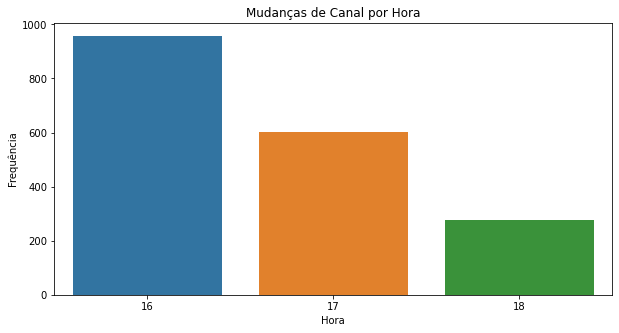

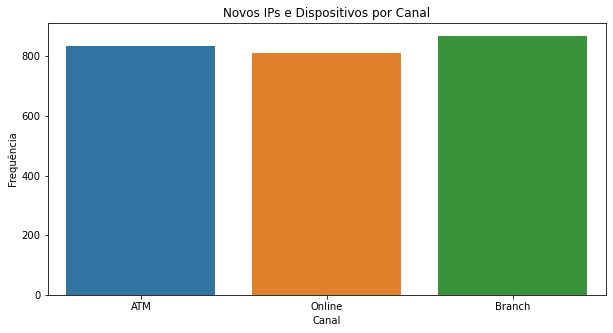

In [20]:
# Extrair a hora da transação e criar a coluna TransactionHour
df_csv_analise['TransactionHour'] = df_csv_analise['TransactionDate'].dt.hour

# Gráfico de mudanças de canal por hora
plt.figure(figsize=(10, 5))
sns.countplot(data=df_csv_analise[df_csv_analise['ChannelChange']], x='TransactionHour')
plt.title('Mudanças de Canal por Hora')
plt.xlabel('Hora')
plt.ylabel('Frequência')
plt.show()

# Gráfico de novos IPs e dispositivos por canal
plt.figure(figsize=(10, 5))
sns.countplot(data=df_csv_analise[(df_csv_analise['NewIP']) | (df_csv_analise['NewDevice'])], x='Channel')
plt.title('Novos IPs e Dispositivos por Canal')
plt.xlabel('Canal')
plt.ylabel('Frequência')
plt.show()


## Recomendações


## Ação Baseada em Pontuação

Cada transação recebe uma pontuação de risco com base em critérios definidos. O sistema acumula o score do cliente conforme a detecção de comportamentos suspeitos.

**1.Critérios para Incremento de Score**

Transação acima de um limite definido (exemplo: 2.000): +30 pontos.

Fora do horário usual do cliente (exemplo: horário fora do padrão das transações anteriores): +10 pontos.

Localização inesperada (país ou região diferente), caso o cliente não tenha informado previamente ao banco sobre a viagem: +40 pontos.

Dispositivo novo ou IP não reconhecido: +30 pontos.

Tentativas de login recentes falhas: +10 pontos.

Transação muito diferente do comportamento médio do cliente: +20 pontos.

**2. Ações com Base no Score**

Score < 30: Nenhuma ação (transação confiável).

Score entre 30 e 60: Autenticação leve, como SMS ou email.

Score entre 60 e 90: Autenticação forte, como envio de código e confirmação via app bancário.

Score ≥ 90: Bloqueio temporário e solicitação de autenticação facial ou contato com o cliente.